In [1]:
# If you are running locally without google colab, comment this out
# Also need to uncomment path in cell below
from google.colab import drive
drive.mount('/content/drive')
# folder path
path='/content/drive/My Drive/ECSE 415/Final_project/dataset'

Mounted at /content/drive


In [2]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import dlib
import os

#path = './dataset'
        #  -1, 0, 1, 2
labels = ['DontCare', 'Van', 'Car', 'Cyclist', 'Truck', 'Pedestrian', 'Misc'];

In [3]:
#Input Parameters : filepath, dictionary to store patch information
#For a sequence file, returns a dictionary with each frame as its key and the object id, class and patch coordinates as the values
def parsefile(filepath, patch_dict):
    #  <frame>, <id>, <type>, <truncated>, <occluded>, <alpha>, <bb_left>, <bb_top>, <bb_right>, <bb_bottom>, <3D_H>, <3D_W>, <3D_L>, <x>,   <y>,   <z>,   <ry>
    patch_mask = [False, True, True, False, False, False, True, True, True, True, False, False, False, False, False, False, False];
    lines = open(filepath, 'r').readlines();
    for line in lines:
        patch_data = line.strip().split(' ');
        patch_data = np.asarray(patch_data);
        frame = int(patch_data[0]);
        patch_coordinates = patch_data[patch_mask];
        if (frame not in patch_dict.keys()):
            patch_dict[frame] = [];
            patch_dict[frame].append(patch_coordinates);
        else:
            patch_dict[frame].append(patch_coordinates);

In [4]:
patches_s0 = {};
patches_s1 = {};
patches_s2 = {};
patches_s3 = {};

parsefile(path + '/0000.txt', patches_s0);
parsefile(path + '/0001.txt', patches_s1);
parsefile(path + '/0002.txt', patches_s2);
parsefile(path + '/0003.txt', patches_s3);

In [ ]:
#Helper method if the directories for the patches do not exist
#for i in range(4):
#    dir_path = './dataset/Seq{}'.format(i);
#    os.mkdir(dir_path);

In [5]:
#Input Parameters: path of each sequence, path where the patches should be stored, dictionary of the patches, empty target list
#Extracts the patches and saves them in the respective frame directory. Returns a list with all the labels present in the sequence
def extract_patches(image_dir, sequence_patch_dir, patch_dict):
    i = 0;
    label_list = [];
    for frame_num in range(len(patch_dict)):
        patch_list = patch_dict[frame_num];
        if (frame_num < 10):
            img_path = image_dir + '00000{}.png'.format(frame_num);
        if (frame_num > 9 and frame_num < 100):
            img_path = image_dir + '0000{}.png'.format(frame_num);
        if (frame_num > 99):
            img_path = image_dir + '000{}.png'.format(frame_num);
        sequence_img = dlib.load_rgb_image(img_path);
        for patch in patch_list:
            label = (patch[0], patch[1]);
            label_list.append(label);
            patch_coordinates = patch[2:6];
            patch_rect = dlib.rectangle(int(float(patch_coordinates[0])), int(float(patch_coordinates[1])), int(float(patch_coordinates[2])), int(float(patch_coordinates[3])));
            img_patch = dlib.sub_image(sequence_img, patch_rect);
            save_file_path = sequence_patch_dir + 'img_{0}.jpeg'.format(i);
            dlib.save_image(img_patch, save_file_path);
            i = i + 1;
    return label_list

In [6]:
s0 = path + '/0000/';
s1 = path + '/0001/';
s2 = path + '/0002/';
s3 = path + '/0003/';

output_dir_s0 = path + '/Seq0/';
output_dir_s1 = path + '/Seq1/';
output_dir_s2 = path + '/Seq2/';
output_dir_s3 = path + '/Seq3/';

In [7]:

labels_s0 = extract_patches(s0, output_dir_s0, patches_s0);
labels_s1 = extract_patches(s1, output_dir_s1, patches_s1);
labels_s2 = extract_patches(s2, output_dir_s2, patches_s2);
labels_s3 = extract_patches(s3, output_dir_s3, patches_s3);

In [9]:
#Input Parameters: The directory of the patches, labels for the patches
#Splits the dataset into their respective lists
def dataset_split(sequence_patch_dir, labels):
    dont_cares = [];
    trucks = [];
    vans = [];
    cars = [];
    cyclists = [];
    pedestrians = [];
    miscellaneous = [];
    for index, label in enumerate(labels):
        image_path = sequence_patch_dir + 'img_' + str(index) + '.jpeg';
        image = dlib.load_rgb_image(image_path);
        np.asarray(image).astype(np.float32);
        if (label[1] == 'DontCare'):
            dont_cares.append(image);
        elif (label[1] == 'Truck'):
            trucks.append(image);
        elif (label[1] == 'Van'):
            vans.append(image);
        elif (label[1] == 'Car'):
            cars.append(image);
        elif (label[1] == 'Cyclist'):
            cyclists.append(image);
        elif (label[1] == 'Pedestrian'):
            pedestrians.append(image);
        elif (label[1] == 'Misc'):
            miscellaneous.append(image);
        else:
            print(label[1])
    return dont_cares, trucks, vans, cars, cyclists, pedestrians, miscellaneous;

In [10]:
dont_cares_s0, trucks_s0, vans_s0, cars_s0, cyclists_s0, pedestrians_s0, miscellaneous_s0 = dataset_split(output_dir_s0, labels_s0);
dont_cares_s1, trucks_s1, vans_s1, cars_s1, cyclists_s1, pedestrians_s1, miscellaneous_s1 = dataset_split(output_dir_s1, labels_s1);
dont_cares_s2, trucks_s2, vans_s2, cars_s2, cyclists_s2, pedestrians_s2, miscellaneous_s2 = dataset_split(output_dir_s2, labels_s2);
dont_cares_s3, trucks_s3, vans_s3, cars_s3, cyclists_s3, pedestrians_s3, miscellaneous_s3 = dataset_split(output_dir_s3, labels_s3);

In [12]:
dont_cares = dont_cares_s0 + dont_cares_s1 + dont_cares_s2 + dont_cares_s3;
trucks = trucks_s0 + trucks_s1 + trucks_s2 + trucks_s3;
vans = vans_s0 + vans_s1 + vans_s2 + vans_s3;
cars = cars_s0 + cars_s1 + cars_s2 + cars_s3;
cyclists = cyclists_s0 + cyclists_s1 + cyclists_s2 + cyclists_s3;
pedestrians = pedestrians_s0 + pedestrians_s1 + pedestrians_s2 + pedestrians_s3;
miscellaneous = miscellaneous_s0 + miscellaneous_s1 + miscellaneous_s2 + miscellaneous_s3;

In [13]:
dont_cares_count = len(dont_cares);
trucks_count = len(trucks);
vans_count = len(vans);
cars_count = len(cars);
cyclists_count = len(cyclists);
pedestrians_count = len(pedestrians);
miscellaneous_count = len(miscellaneous);

In [16]:
vehicle_count = truck_count_s0 + truck_count_s1 + truck_count_s2 + truck_count_s3  + van_count_s0 + van_count_s1 + van_count_s2 + van_count_s3 + car_count_s0 + car_count_s1 + car_count_s2 + car_count_s3 + cyclist_count_s0 + cyclist_count_s1 + cyclist_count_s2 + cyclist_count_s3;
non_vehicle_count = dont_care_count_s0 + dont_care_count_s1 + dont_care_count_s2 + dont_care_count_s3 + pedestrian_count_s0 + pedestrian_count_s1 + pedestrian_count_s2 + pedestrian_count_s3 + miscellaneous_count_s0 + miscellaneous_count_s1 + miscellaneous_count_s2 + miscellaneous_count_s3;

In [23]:
def rescale(images):
    rescaled_images = [];
    for image in images:
        rescaled_image = dlib.resize_image(image, 224, 224);
        rescaled_images.append(rescaled_image);
    return rescaled_images;

In [24]:
dont_cares_rescaled = rescale(dont_cares);
trucks_rescaled = rescale(trucks);
vans_rescaled = rescale(vans);
cars_rescaled = rescale(cars);
cyclists_rescaled = rescale(cyclists);
pedestrians_rescaled = rescale(pedestrians);
miscellaneous_rescaled = rescale(miscellaneous);

In [25]:
def convert_to_gray(images):
    grayscale_images = [];
    for image in images:
        gray_image = dlib.as_grayscale(image);
        grayscale_images.append(gray_image);
    return grayscale_images;

In [26]:
dont_cares_grayscale = convert_to_gray(dont_cares_rescaled);
trucks_grayscale = convert_to_gray(trucks_rescaled);
vans_grayscale = convert_to_gray(vans_rescaled);
cars_grayscale = convert_to_gray(cars_rescaled);
cyclists_grayscale = convert_to_gray(cyclists_rescaled);
pedestrians_grayscale = convert_to_gray(pedestrians_rescaled);
miscellaneous_grayscale = convert_to_gray(miscellaneous_rescaled);

In [28]:
# combine vehicles and non-vehicles into one list
# created their correspondent labels as another list
vehicles = trucks_grayscale + vans_grayscale + cars_grayscale
non_vehicles = dont_cares_grayscale + cyclists_grayscale + pedestrians_grayscale + miscellaneous_grayscale
vehicles_labels = []
non_vehicles_labels = []

# 1 is vehicle
# 0 is non-vehicle
# dont change this, if not, precision and recall score will output error message in models!
for i in range(len(vehicles)):
  vehicles_labels.append(1)

for j in range(len(non_vehicles)):
  non_vehicles_labels.append(0)

data_combined = vehicles + non_vehicles
labels_combined = vehicles_labels + non_vehicles_labels


In [29]:
# Shuffle the data
from sklearn.utils import shuffle
import numpy as np

data_combined, labels_combined = shuffle(data_combined, labels_combined)

In [30]:
# split test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_combined, labels_combined, test_size=0.2, random_state=42)

In [31]:
# convert to numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [32]:
# keras libraries
import keras
import tensorflow 
from keras.layers import Layer
import tensorflow.keras.backend as K
from tensorflow.python.client import device_lib
import tensorflow as tf

In [33]:
# checks for GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [34]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

import cv2 
import numpy as np 
from keras import backend as K 
from keras.utils import np_utils

import math 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

In [35]:
# code inspired from 
# https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/
# implmentation based on paper: "Going Deeper with Convulution"
# Build inception sub-network
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [36]:
# initiate kernel
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [37]:
# input image shape
input_layer = Input(shape=(224, 224, 1))
# build convolutional sub-network
x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)
# inception network
x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')
# maxpooling to downsample data
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
# to 1D
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
# to prevent overfitting
x1 = Dropout(0.7)(x1)
# activation function layer
x1 = Dense(2, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(2, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(2, activation='softmax', name='output')(x)

In [38]:
# create model
model = Model(input_layer, [x, x1, x2], name='inception_v1')

In [39]:
model.summary()
# output model architecture

Model: "inception_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv_1_7x7/2 (Conv2D)          (None, 112, 112, 64  3200        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pool_1_3x3/2 (MaxPooling2D  (None, 56, 56, 64)  0           ['conv_1_7x7/2[0][0]']           
 )                                                                                     

In [47]:
# code taken from stackoverflow
# compute precision and recall
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [48]:
# epoch = number of times the network sees entire dataset once
epochs = 60
# hyperparameter
initial_lrate = 0.005
# to prevent overfitting by decay
def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
# optimizer
sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)
# print decay rate
lr_sc = LearningRateScheduler(decay, verbose=1)
# loss function
loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)
# train the model
model.compile(loss=['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy', 'sparse_categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy', precision_m, recall_m])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [49]:
# output the model's performance
history = model.fit(X_train, [y_train, y_train, y_train], validation_data=(X_test, [y_test, y_test, y_test]), epochs=epochs, batch_size=256, callbacks=[lr_sc])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/60
25/25 [==============================] - 61s 2s/step - loss: 1.2916 - output_loss: 0.8393 - auxilliary_output_1_loss: 0.7744 - auxilliary_output_2_loss: 0.7330 - output_accuracy: 0.5664 - output_precision_m: 0.6103 - output_recall_m: 1.0000 - auxilliary_output_1_accuracy: 0.5945 - auxilliary_output_1_precision_m: 0.6103 - auxilliary_output_1_recall_m: 1.0000 - auxilliary_output_2_accuracy: 0.5700 - auxilliary_output_2_precision_m: 0.6103 - auxilliary_output_2_recall_m: 1.0000 - val_loss: 1.0009 - val_output_loss: 0.6350 - val_auxilliary_output_1_loss: 0.5853 - val_auxilliary_output_2_loss: 0.6343 - val_output_accuracy: 0.5977 - val_output_precision_m: 0.5801 - val_output_recall_m: 1.0000 - val_auxilliary_output_1_accuracy: 0.6493 - val_auxilliary_output_1_precision_m: 0.5801 - val_auxilliary_output_1_recall_m: 1.0000 - val_auxilliary_output_2_accuracy: 0.5977 - val_auxilliary_output_2_precision_m: 0.5801 - val_au

In [50]:

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'output_loss', 'auxilliary_output_1_loss', 'auxilliary_output_2_loss', 'output_accuracy', 'output_precision_m', 'output_recall_m', 'auxilliary_output_1_accuracy', 'auxilliary_output_1_precision_m', 'auxilliary_output_1_recall_m', 'auxilliary_output_2_accuracy', 'auxilliary_output_2_precision_m', 'auxilliary_output_2_recall_m', 'val_loss', 'val_output_loss', 'val_auxilliary_output_1_loss', 'val_auxilliary_output_2_loss', 'val_output_accuracy', 'val_output_precision_m', 'val_output_recall_m', 'val_auxilliary_output_1_accuracy', 'val_auxilliary_output_1_precision_m', 'val_auxilliary_output_1_recall_m', 'val_auxilliary_output_2_accuracy', 'val_auxilliary_output_2_precision_m', 'val_auxilliary_output_2_recall_m', 'lr'])


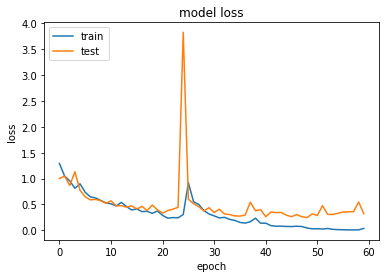

In [51]:
# code taken from stackoverflow
# print model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

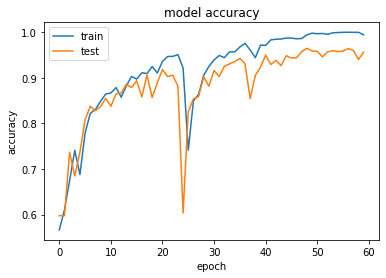

In [52]:
# code taken from stackoverflow
# print model accuracy
plt.plot(history.history['output_accuracy'])
plt.plot(history.history['val_output_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# SVM
# https://www.kaggle.com/code/manikg/training-svm-classifier-with-hog-features/notebook
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import cv2


img_size = (28, 28) # h x w in pixels
cell_size = (2, 2)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 4  # number of orientation bins

# create HoG Object
# winSize is the size of the image cropped to multiple of the cell size
# all arguments should be given in terms of number of pixels
hog = cv2.HOGDescriptor(_winSize=(img_size[1] // cell_size[1] * cell_size[1],
                                  img_size[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

features = []
for i in range(len(data_combined)):
    features.append(hog.compute(data_combined[i].astype(np.uint8)).reshape(1, -1))
features = np.vstack(features)

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_validate

# RBF SVM Classifier
scoring = ['accuracy','precision','recall']
clf_rbf = svm.SVC(gamma='scale',C = 10, kernel='rbf', random_state = 1)
scores_svm = cross_validate(clf_rbf, features, labels_combined, scoring=scoring, cv=3)
sorted(scores_svm.keys())
print(scores_svm)

{'fit_time': array([59.30911279, 56.31443477, 55.15321589]), 'score_time': array([27.50945973, 27.24515367, 28.10421205]), 'test_accuracy': array([0.93152805, 0.92920696, 0.92301741]), 'test_precision': array([0.94723295, 0.93904762, 0.93842207]), 'test_recall': array([0.9393746 , 0.94444444, 0.93422733])}


{'fit_time': array([59.30911279, 56.31443477, 55.15321589]), 'score_time': array([27.50945973, 27.24515367, 28.10421205]), 'test_accuracy': array([0.93152805, 0.92920696, 0.92301741]), 'test_precision': array([0.94723295, 0.93904762, 0.93842207]), 'test_recall': array([0.9393746 , 0.94444444, 0.93422733])}

In [ ]:
# This is testing if our model is the right thing
# We train and test the model with random labels
random = labels_combined.copy()
random = shuffle(random)

from sklearn import svm
from sklearn.model_selection import cross_val_score

# RBF SVM Classifier
clf_rbf = svm.SVC(gamma='scale',C = 10., kernel='rbf', random_state = 1)
scores_random = cross_val_score(clf_rbf, features, random, cv=3)
print(scores_random)

[0.53307544 0.54197292 0.54468085]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
scoring = ['accuracy','precision','recall']
clf_forest = RandomForestClassifier(n_estimators=300, max_depth=10, criterion='entropy')
scores_forest = cross_validate(clf_forest, features, labels_combined, scoring=scoring, cv=3)
sorted(scores_forest.keys())
print(scores_forest)


{'fit_time': array([102.24426293, 103.4379189 , 103.05279541]), 'score_time': array([0.3187964 , 0.29619741, 0.37056136]), 'test_accuracy': array([0.8549323 , 0.86189555, 0.84410058]), 'test_precision': array([0.85308057, 0.86089552, 0.84145625]), 'test_recall': array([0.91895341, 0.92081737, 0.91507024])}
